# Gradient of Image

## import library

In [3]:
#%%
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [4]:
I0 = img.imread('test.jpeg')

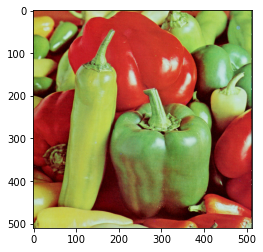

In [5]:
plt.imshow(I0)
plt.show()from Computer_Vision.Sobel_Edge_Detection.convolution import convolution

## check the size of the input image

In [6]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = (I0.shape)[0]
num_column  = (I0.shape)[1]
num_channel = (I0.shape)[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [13]:
print(type(I))

<class 'numpy.ndarray'>


In [27]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
R,G,B=I0[:,:,0],I0[:,:,1],I0[:,:,2]
R=np.uint16(R)
G=np.uint16(G)
B=np.uint16(B)
I = (R+G+B)/3
I=np.uint8(I)    
    
num_row     = (I.shape)[0]
num_column  = (I.shape)[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [28]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I-np.min(I))/(np.max(I)-np.min(I))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [57]:
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions
    
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image
    
    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]
    
    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1, 
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    
    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1)) 

            # Places the calculated value into the output_array
            output_array[x, y] = output_values
            
    return output_array

In [63]:
filter = np.array([
    [0, -1, 1],
    [0, -1, 1],
    [0, -1, 1]
], dtype=np.float32)/9.0 # Box Filter
image_arr = np.array(I)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
print(convolved_arr)

[[[-1.54392467e-05]
  [-8.57735927e-06]
  [ 1.20083030e-05]
  ...
  [-2.74475497e-05]
  [-4.44307210e-04]
  [-6.86188741e-06]]

 [[ 5.14641556e-06]
  [-2.91630215e-05]
  [ 2.40166059e-05]
  ...
  [-5.66105712e-05]
  [-6.63887607e-04]
  [-1.02928311e-05]]

 [[ 4.28867963e-05]
  [-6.00415149e-05]
  [ 2.05856622e-05]
  ...
  [-4.63177400e-05]
  [-6.79326854e-04]
  [-6.86188741e-06]]

 ...

 [[ 1.71547185e-05]
  [-2.71050543e-20]
  [-9.60664238e-05]
  ...
  [ 6.86188741e-06]
  [-9.33216688e-04]
  [-1.71547185e-05]]

 [[ 2.05856622e-05]
  [-1.88701904e-05]
  [-4.46022682e-05]
  ...
  [-1.71547185e-05]
  [-9.02338195e-04]
  [-1.54392467e-05]]

 [[ 2.23011341e-05]
  [-3.08784934e-05]
  [-1.71547185e-06]
  ...
  [-5.31796275e-05]
  [-5.78114015e-04]
  [-1.71547185e-06]]]


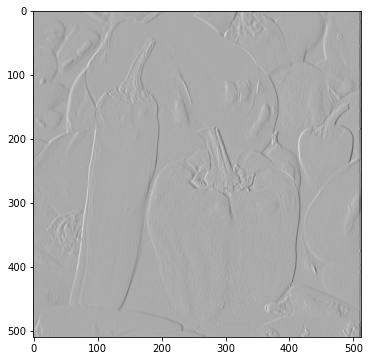

In [64]:
plt.figure(figsize=(8,6))
plt.imshow(convolved_arr, cmap='gray')
plt.show()

In [29]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    filter = np.array([
        [0, -1, 1],
        [0, -1, 1],
        [0, -1, 1]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)/255.0
    D = convolve(image_arr, filter, padding=(1, 1))

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [30]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=I[j][i]-I[j-1][i]
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [31]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # dx = np.array([[1, 0, -1],
    #                [1, 0, -1],
    #                [1, 0, -1]], dtype=np.float32)  
    # D=cv2.filter2D(I, -1, dx, delta=128)
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=0.5*(I[j+1][i]-I[j-1][i])    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [32]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=I[j][i+1]-I[j][i]  
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [33]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=I[j][i]-I[j][i-1]
    
    
    ##
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [34]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # dx = np.array([[1, 1, 1],
    #                [0, 0, 0],
    #                [-1, 0, -1]], dtype=np.float32)  
    # D=cv2.filter2D(I, -1, dx, delta=128)
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=0.5*(I[j][i+1]-I[j][i-1])  
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [35]:
D = np.zeros(I.shape)
#print(D.shape)
h,w=D.shape
for i in range(0,w-1):
    for j in range(0,h-1):
        D[j][i]=0.5*(I[j+1][i+1]-I[j-1][i-1])
D=(D[0]**2)+(D[1]**2)
#D = np.linalg.norm(D,axis=2)
#D=LA.norm(D,2)
#print(D)
print(D)
# print(D.shape) 
# plt.figure(figsize=(8,6))
# plt.imshow(D, cmap='gray')
# plt.show()

[9.54879410e-02 5.92876186e-04 1.24000248e-04 6.58751318e-04
 7.47876496e-04 1.31750264e-03 3.47975696e-03 1.01137702e-03
 4.10750822e-04 5.03751008e-03 8.65676731e-03 5.77376155e-03
 9.68751938e-03 4.61900924e-03 3.97188294e-03 8.57539215e-03
 1.04818960e-02 1.49575299e-02 1.11987724e-02 1.50854052e-02
 1.39849030e-02 1.05477711e-02 1.49304049e-02 1.10243970e-02
 1.87627875e-02 1.19698989e-02 1.49110298e-02 1.35509021e-02
 1.13033976e-02 1.40469031e-02 1.10747721e-02 1.35509021e-02
 1.68834088e-02 1.31750264e-02 1.30355261e-02 1.73949098e-02
 1.08848968e-02 1.80575361e-02 1.44344039e-02 1.90069130e-02
 1.64067828e-02 1.85457871e-02 2.73459297e-02 1.39849030e-02
 2.12350425e-02 1.73949098e-02 1.70694091e-02 1.68834088e-02
 1.35044020e-02 2.18317937e-02 1.33494017e-02 1.32254015e-02
 1.84489119e-02 1.48994048e-02 1.91774134e-02 1.36787774e-02
 1.58875318e-02 1.45157790e-02 1.77824106e-02 1.44809040e-02
 1.53954058e-02 2.18124186e-02 1.53954058e-02 1.90495381e-02
 1.84837870e-02 2.419942

In [36]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h,w=D.shape
    for i in range(0,w-1):
        for j in range(0,h-1):
            D[j][i]=0.5*(I[j+1][i+1]-I[j-1][i-1])
    norm_gradient=D[0]**2+D[1]**2
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [37]:
#%%
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [38]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [39]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [40]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [41]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [42]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [43]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [44]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [45]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [46]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [47]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [48]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

    print('value3 = ', value3)
    print('value4 = ', value4)

In [49]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [51]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [53]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [54]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [55]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


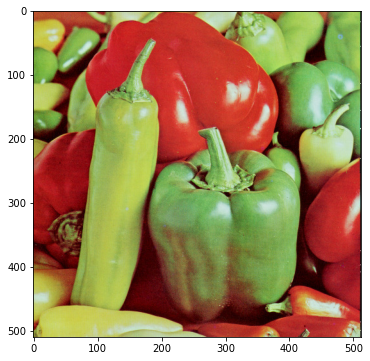

**************************************************
## [RESULT 02]
**************************************************


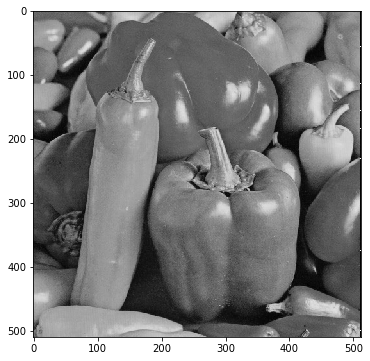

**************************************************
## [RESULT 03]
**************************************************


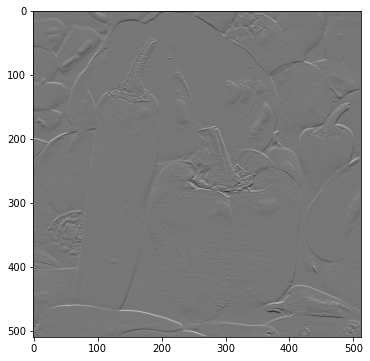

**************************************************
## [RESULT 04]
**************************************************


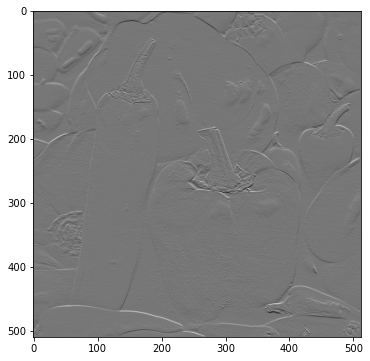

**************************************************
## [RESULT 05]
**************************************************


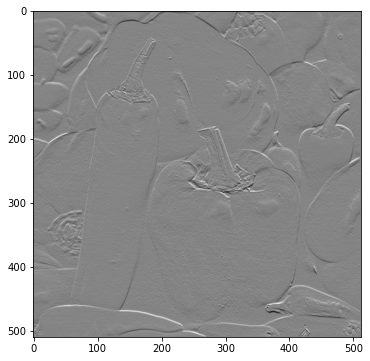

**************************************************
## [RESULT 06]
**************************************************


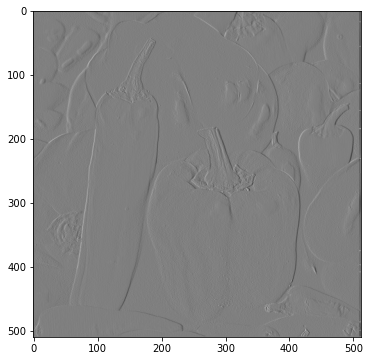

**************************************************
## [RESULT 07]
**************************************************


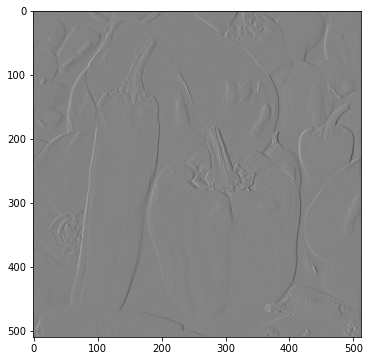

**************************************************
## [RESULT 08]
**************************************************


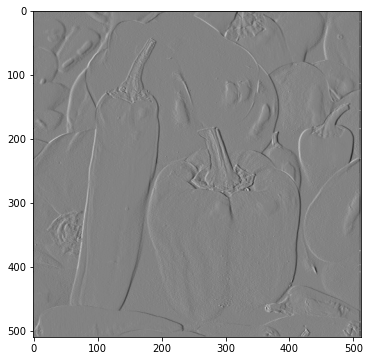

**************************************************
## [RESULT 09]
**************************************************


ValueError: not enough values to unpack (expected 2, got 1)

In [56]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)